# Linear Regression Model for Predicting Used Car Prices

### Cars4U - Problem Statement

### <span style="color:green">Objective</span>
To explore and visualize the cars4u dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

### <span style="color:green">Data Description</span>
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- Price: The price of the used car in INR Lakhs
 

### <span style="color:green">Investigative Guidelines</span>
Given the data we have to analyse, we can establish a few questions in order to explore and analyse the data and draw insights. However, the data is not comprehensive and therefore, we must keep a few gaps in mind when we perform our analyses. 

#### Assumptions
When it comes to determining / predicting used car prices, our experience dictates that there are certain other factors that can influence purchase, but are not considered in the dataset:
- Economic factors of the buyer
- Depreciation rates of the car
- pre-sale maintenance costs
- history of accidents, faults, recalls, wear and tear. 
- exclusive features on body/trim, example: Sunroof, remote heating, etc. 
- Theft likelihood of a particular brand (for example, Honda CR-V's are more likely to be stolen than other brands.)
- Custom modifications or branding which can elevate the price.

#### Exploratory questions
Keeping the assumptions in mind, we can probe the data to derive certain insights:
1. How does the brand & model affect used car prices?
2. How does location affect used car prices?
3. As cars transfer through multiple owners, how is the price influenced?
4. How does the key performance parameters - Engine, Power, Mileage - affect prices?
5. As cars age or with more kilometers on the odometer, does the price increase or decrease?
6. Does number of seats, fuel type, transmission influence the price?
7. Given these, what are the independent variables that can affect used car prices?


### <span style="color:green">Import Necessary Libraries</span>

In [1]:
# to make Python code more structured
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# import string and regex
import string
import re

# import warnings and ignore
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

<IPython.core.display.Javascript object>

### <span style="color:green">Load Dataset</span>

In [2]:
# load the dataset
df = pd.read_csv("used_cars_data.csv")

# print the number of shapes and columns
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# generate a random sample of dataset
np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36,8.20


<IPython.core.display.Javascript object>

#### Get the info regarding column datatypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

#### Summary statistics for the columns

In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>

1. There are 7253 rows and 14 columns. 
2. There are missing values in Mileage, Engine, Power, Seats and Price. We will need to analyse the nature of these missing values. 
3. The oldest car is from 1996 and the latest is from 2019. 
4. The minimum price of an used car is 44,000INR and maximum price is 160 lakhs INR, both of which seem to be outliers, but will need further exploration to understand its nature. 
5. The most sold car is Mahindra XUV500 W8 2WD

#### Unique values of category columns
While Mileage, Engine, Power are listed as "object", they may truly not be object in type and we can process them later to correctly analyse. 

We can assess the unique values in the truly categorical columns: Name, Location, Fuel_Type, Transmission, Owner_Type

In [5]:
# this code is meant to return the counts of each unique entry in the columns considered as categorical (declared in "cate_col")
# if there are more than 20 unique values in a column, only the first 20 of the total are displayed

num_to_display = 20
cate_cols = [
    "Name",
    "Location",
    "Fuel_Type",
    "Transmission",
    "Owner_Type",
]  # defining the categorical variables


for colname in cate_cols:
    print(colname, "\n")
    val_counts = df[colname].value_counts(dropna=False)
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 40)
    print("\n\n")  # for more space between

Name 

Mahindra XUV500 W8 2WD              55
Maruti Swift VDI                    49
Maruti Swift Dzire VDI              42
Honda City 1.5 S MT                 39
Maruti Swift VDI BSIV               37
Maruti Ritz VDi                     35
Toyota Fortuner 3.0 Diesel          35
Honda Amaze S i-Dtech               32
Hyundai Grand i10 Sportz            32
Honda City 1.5 V MT                 32
Honda Brio S MT                     32
Hyundai i10 Sportz                  31
Maruti Alto LXi                     30
Maruti Wagon R LXI                  29
Maruti Ertiga VDI                   28
Volkswagen Polo 1.2 MPI Highline    26
Maruti Wagon R VXI                  25
Hyundai EON Era Plus                25
Hyundai Verna 1.6 SX                25
Toyota Fortuner 4x2 AT              23
Name: Name, dtype: int64
Only displaying first 20 of 2041 values.
----------------------------------------



Location 

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
De

<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>
1. There are more than 20 unique values in 'Name' column. This column is a combination of Brand and Model and we can split this column and drop the 'Name' column as such. 
2. Most cars in the list are Diesel, followed by Petrol. There are only two electric cars
3. Manual transmission cars are higher in this list. 
4. Most cars are on their first ownership. 
5. Mumbai has recorded the most number of sales and Ahmedabad has recorded the least.

### <span style="color:green">Univariate and multivariate analyses</span>

#### Data Pre-processing
Let's do some EDA to see the nature & inter-relationship of the data, understand more about the missingness of values and generate some insights to correct them. But before we do that, let's try to pre-process the data as much as we can to ensure that it is clean and consistent and can be used for EDA.

#### Splitting 'Name' into 'Brand' and 'Model'
We can generate more meaningful insights if we split the combined name to extract the Brand and Model. It looks like the first string of the value in the Name column is the Brand and the rest can be the model. We can later analyse the split data to see if there are any exceptions to this rule. 

In [6]:
# split 'Name' and assign the first string to 'Brand' and the remaining to 'Model', both of which are new columns.
df["Brand"] = df["Name"].str.split(" ", 1).str[0]
df["Model"] = df["Name"].str.split(" ", 1).str[1:].apply(". ".join)

# check a sample to see if split was done correctly
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,Maruti,Wagon R LXI CNG
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,Honda,Jazz V
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,Maruti,Ertiga VDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,Audi,A4 New 2.0 TDI Multitronic


<IPython.core.display.Javascript object>

In [7]:
# unique values are retrieved to see if there are any exceptions to the logic we applied
df["Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

<IPython.core.display.Javascript object>

It looks like Land stands for Land Rover and Mini for Mini Cooper - both these instances would need to be corrected. Isuzu and ISUZU both stand for the same brand and need to be maintained uniformly. 

In [8]:
df.loc[df.Brand == "ISUZU", "Brand"] = "Isuzu"
df.loc[df.Brand == "Mini", "Brand"] = "Mini Cooper"
df.loc[df.Brand == "Land", "Brand"] = "Land Rover"

# check unique values to see if changes are applied
df["Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

<IPython.core.display.Javascript object>

We will not, however, make any further changes to the 'Model' as it can tamper with the model name. For example, since we have added Cooper to Mini, it makes sense to remove 'Cooper' from the 'Model name. However, some of the models are Mini Countryman Cooper / Clubman Cooper / Cooper Convertible and changing them may result in tampering. As it is, w.r.t Name, we have sufficient information to proceed with Analysis. 

In [9]:
# sample to understand the note above
df[df["Brand"] == "Mini Cooper"].head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
176,176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,42.12,23.00,Mini Cooper,Countryman Cooper D
228,228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28,35.67,Mini Cooper,Cooper Convertible S
365,365,Mini Clubman Cooper S,Pune,2017,8350,Petrol,Manual,First,13.8 kmpl,1998 CC,192 bhp,5.0,44.59,35.00,Mini Cooper,Clubman Cooper S
391,391,Mini Cooper Convertible 1.6,Bangalore,2015,20000,Petrol,Automatic,First,18.86 kmpl,1598 CC,122 bhp,4.0,42.12,32.00,Mini Cooper,Cooper Convertible 1.6
427,427,Mini Cooper Convertible S,Mumbai,2014,11900,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28,28.50,Mini Cooper,Cooper Convertible S


<IPython.core.display.Javascript object>

#### Analysing 'Mileage' column
From our initial analyses (df.info()), it appeared that there are only two missing values in the Mileage column. However, a casual analyses of the raw csv file helped to understand that there are 0 values which are not counted. Let us first strip the Mileage column of the units. Since kmpl and km/kg are both kms covered per unit of fuel, it is not required to convert them. 

In [10]:
# stripping the mileage column of all units and performing a check

df["Mileage"] = df["Mileage"].str.replace("km/kg", "")
df["Mileage"] = df["Mileage"].str.replace("kmpl", "")
df["Mileage"].head()

0     26.6 
1    19.67 
2     18.2 
3    20.77 
4     15.2 
Name: Mileage, dtype: object

<IPython.core.display.Javascript object>

In [11]:
# the unit stripped Mileage column is still an object datatype, so it is possible that it has trailing spaces
# remove trailing spaces and convert 0.0 values to nan
# perform check

df["Mileage_n"] = df["Mileage"].str.strip().apply(pd.to_numeric, errors="coerce")
df["Mileage_n"].replace(0.0, np.nan, inplace=True)
df["Mileage_n"]

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
7248    20.54
7249    17.21
7250    23.08
7251    17.20
7252    10.00
Name: Mileage_n, Length: 7253, dtype: float64

<IPython.core.display.Javascript object>

The new column 'Mileage_n' is now of float type. 

#### Analysing 'Power' and 'Engine' column

In [12]:
# this same procedure can be applied to Engine and power columns
df["Engine"] = df["Engine"].str.replace("CC", "")
df["Engine_n"] = df["Engine"].str.strip().apply(pd.to_numeric, errors="coerce")
df["Engine_n"].replace(0.0, np.nan, inplace=True)

df["Engine_n"]

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
7248    1598.0
7249    1197.0
7250    1461.0
7251    1197.0
7252    2148.0
Name: Engine_n, Length: 7253, dtype: float64

<IPython.core.display.Javascript object>

In [13]:
#replacing bhp and stripping empty spaces in the Power column
df["Power"] = df["Power"].str.replace("bhp", "")
df["Power_n"] = df["Power"].str.strip().apply(pd.to_numeric, errors="coerce")
df["Power_n"].replace(0.0, np.nan, inplace=True)

df["Power_n"]

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
7248    103.60
7249    103.60
7250     63.10
7251    103.60
7252    170.00
Name: Power_n, Length: 7253, dtype: float64

<IPython.core.display.Javascript object>

In [14]:
# dropping columns that we have modified - Name, Mileage, Engine, Power
# dropping also S.No since we will not be using it for analysis.

df.drop(["S.No.", "Name", "Mileage", "Power", "Engine"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [15]:
# checking new summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Seats              7200 non-null   float64
 7   New_Price          7253 non-null   float64
 8   Price              6019 non-null   float64
 9   Brand              7253 non-null   object 
 10  Model              7253 non-null   object 
 11  Mileage_n          7170 non-null   float64
 12  Engine_n           7207 non-null   float64
 13  Power_n            7078 non-null   float64
dtypes: float64(6), int64(2), object(6)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

In [16]:
# taking a count of null values in the dataframe after the above treatments
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power_n               175
Mileage_n              83
Seats                  53
Engine_n               46
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
Brand                   0
Model                   0
dtype: int64

<IPython.core.display.Javascript object>

The new summary shows that data types have been corrected, new columns have been added. We also have better indication of null values in the different columns. Before we proceed with EDA, let's analyse the Seats column to see if missing values in this column can be easily fixed with our knowledge that most cars can have just 5-7 seats. Since there are only 53 missing values in this column, which is relatively few in number, this can be easily fixed. 

In [17]:
# grouping the null values in Seats by Brand and Model

df[df["Seats"].isnull()].groupby(["Brand", "Model"]).size()

Brand       Model                                  
BMW         5 Series 520d Sedan                        7
Fiat        Punto 1.2 Dynamic                          1
            Punto 1.3 Emotion                          1
            Punto 1.4 Emotion                          2
Ford        Endeavour Hurricane LE                     1
            Figo Diesel                                1
Honda       CR-V AT With Sun Roof                      1
            City 1.3 DX                                1
            City 1.5 EXI                               1
            City 1.5 GXI                               3
            Jazz 2020 Petrol                           1
            Jazz Select Edition                        1
Hyundai     Santro GLS II - Euro II                    4
            Santro LP zipPlus                          1
            Santro Xing XG                             2
            i20 new Sportz AT 1.4                      1
Land Rover  Rover Range Rover 3.0 D 

<IPython.core.display.Javascript object>

#### Analysing 'Seats' column

It looks like most of the cars are 5 seaters and we can fill in the null with the value as 5.0

In [18]:
# fill the null values with 5.0
df["Seats"] = df["Seats"].fillna(5.0)

# check if the column has any more null values
df["Seats"].sort_values(ascending=True)

3999     0.0
5781     2.0
1288     2.0
693      2.0
1078     2.0
        ... 
814     10.0
6875    10.0
917     10.0
2575    10.0
6288    10.0
Name: Seats, Length: 7253, dtype: float64

<IPython.core.display.Javascript object>

In [19]:
# checking the car type at the row 3999

df.loc[3999]

Location                                Hyderabad
Year                                         2012
Kilometers_Driven                          125000
Fuel_Type                                  Petrol
Transmission                            Automatic
Owner_Type                                  First
Seats                                         0.0
New_Price                                   53.14
Price                                        18.0
Brand                                        Audi
Model                A4 3.2 FSI Tiptronic Quattro
Mileage_n                                    10.5
Engine_n                                   3197.0
Power_n                                       NaN
Name: 3999, dtype: object

<IPython.core.display.Javascript object>

The Audi A4 Quattro is a 5 seater car, and therefore we can fill the row with this value. 

In [20]:
df.loc[3999, "Seats"] = 5.0

<IPython.core.display.Javascript object>

In [21]:
# checking for null values
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power_n               175
Mileage_n              83
Engine_n               46
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price               0
Brand                   0
Model                   0
dtype: int64

<IPython.core.display.Javascript object>

#### Converting 'Year' to 'Age' column

If we can compute the Age of the car, then it is a more valuable data point to analyse than the year itself. 

In [22]:
# computing Age from current year

df["Current_year"] = 2022
df["Age"] = df["Current_year"] - df["Year"]
df.drop("Current_year", axis=1, inplace=True)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Brand,Model,Mileage_n,Engine_n,Power_n,Age
0,Mumbai,2010,72000,CNG,Manual,First,5.0,5.51,1.75,Maruti,Wagon R LXI CNG,26.60,998.0,58.16,12
1,Pune,2015,41000,Diesel,Manual,First,5.0,16.06,12.50,Hyundai,Creta 1.6 CRDi SX Option,19.67,1582.0,126.20,7
2,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61,4.50,Honda,Jazz V,18.20,1199.0,88.70,11
3,Chennai,2012,87000,Diesel,Manual,First,7.0,11.27,6.00,Maruti,Ertiga VDI,20.77,1248.0,88.76,10
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,53.14,17.74,Audi,A4 New 2.0 TDI Multitronic,15.20,1968.0,140.80,9


<IPython.core.display.Javascript object>

#### Categorizing cars based on New_Price
It is good logic to categorize brands based on a new car's price. For this purpose, we shall use Categories as follows:
- New_Price less than 3.5L == Economy
- New_Price between 3.5L and 10L == Mid-range
- New_Price between 10L and 30L == Premium
- New_Price above 30L == Luxury

In [23]:
# declare function to classify brands based on a new car's price


def assign_class(x):
    if x <= 3.5:
        return "Economy"
    elif (x > 3.5) & (x <= 10.0):
        return "Mid-range"
    elif (x > 10.0) & (x <= 30.0):
        return "Premium"
    elif x > 30.0:
        return "Luxury"
    else:
        return "Unknown"


df["Category"] = df["New_Price"].apply(assign_class)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Brand,Model,Mileage_n,Engine_n,Power_n,Age,Category
0,Mumbai,2010,72000,CNG,Manual,First,5.0,5.51,1.75,Maruti,Wagon R LXI CNG,26.60,998.0,58.16,12,Mid-range
1,Pune,2015,41000,Diesel,Manual,First,5.0,16.06,12.50,Hyundai,Creta 1.6 CRDi SX Option,19.67,1582.0,126.20,7,Premium
2,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61,4.50,Honda,Jazz V,18.20,1199.0,88.70,11,Mid-range
3,Chennai,2012,87000,Diesel,Manual,First,7.0,11.27,6.00,Maruti,Ertiga VDI,20.77,1248.0,88.76,10,Premium
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,53.14,17.74,Audi,A4 New 2.0 TDI Multitronic,15.20,1968.0,140.80,9,Luxury


<IPython.core.display.Javascript object>

We can proceed with EDA to analyse the data and take additional steps to handle missing data after that. 

#### Plotting counts of categorical columns

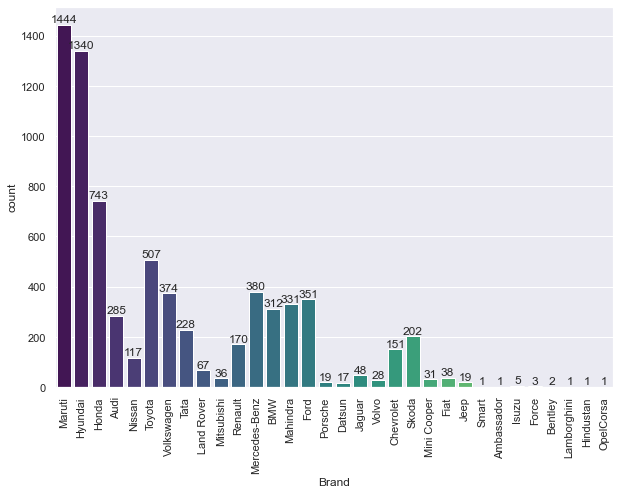

<IPython.core.display.Javascript object>

In [24]:
#countplot of Brand
plt.figure(figsize=(10,7))
sns.set(font_scale=1)
ax = sns.countplot(x='Brand', data=df,palette='viridis')
ax.bar_label(ax.containers[0])
sns.set(font_scale=1)
plt.xticks(rotation=90)
plt.show()    


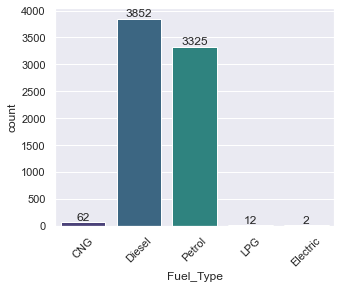

<IPython.core.display.Javascript object>

In [25]:
# countplot of Fuel Type
plt.figure(figsize=(5, 4))
sns.set(font_scale=1)
ax = sns.countplot(x="Fuel_Type", data=df, palette="viridis")
ax.bar_label(ax.containers[0])
sns.set(font_scale=1)
plt.xticks(rotation=45)
plt.show()

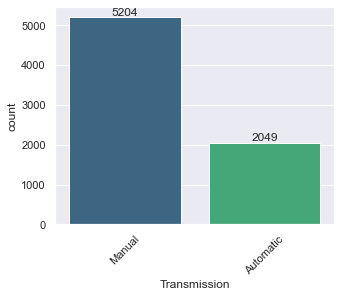

<IPython.core.display.Javascript object>

In [26]:
#countplot of Transmission
plt.figure(figsize=(5,4))
sns.set(font_scale=1)
ax = sns.countplot(x='Transmission', data=df,palette='viridis')
ax.bar_label(ax.containers[0])
sns.set(font_scale=1)
plt.xticks(rotation=45)
plt.show()  



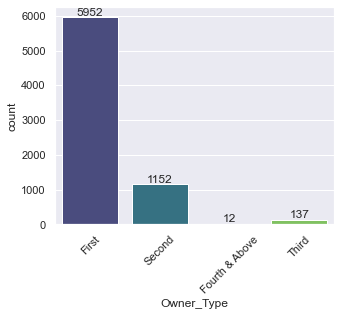

<IPython.core.display.Javascript object>

In [27]:
#countplot of Owner_Type
plt.figure(figsize=(5,4))
sns.set(font_scale=1)
ax = sns.countplot(x='Owner_Type', data=df,palette='viridis')
ax.bar_label(ax.containers[0])
sns.set(font_scale=1)
plt.xticks(rotation=45)
plt.show()  


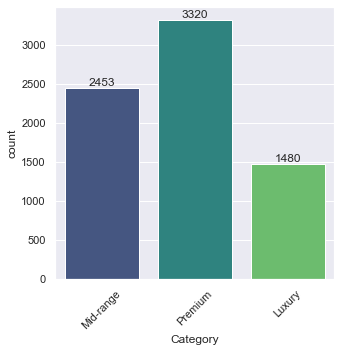

<IPython.core.display.Javascript object>

In [28]:
# countplot of Category
plt.figure(figsize=(5, 5))
sns.set(font_scale=1)
ax = sns.countplot(x="Category", data=df, palette="viridis")
ax.bar_label(ax.containers[0])
sns.set(font_scale=1)
plt.xticks(rotation=45)
plt.show()

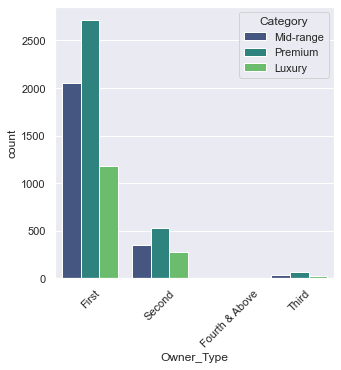

<IPython.core.display.Javascript object>

In [29]:
# countplot of Category vs Owner Type
plt.figure(figsize=(5, 5))
sns.set(font_scale=1)
sns.countplot(x="Owner_Type", data=df, palette="viridis", hue="Category")
sns.set(font_scale=1)
plt.xticks(rotation=45)
plt.show()

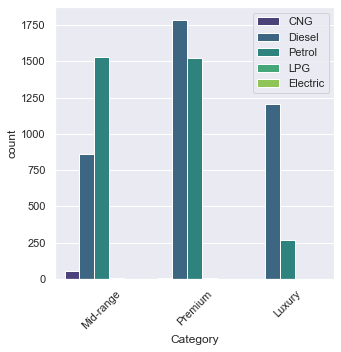

<IPython.core.display.Javascript object>

In [30]:
# countplot of Category split by Fuel Type
plt.figure(figsize=(5, 5))
sns.set(font_scale=1)
ax = sns.countplot(x="Category", data=df, hue="Fuel_Type", palette="viridis")
sns.set(font_scale=1)
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.show()

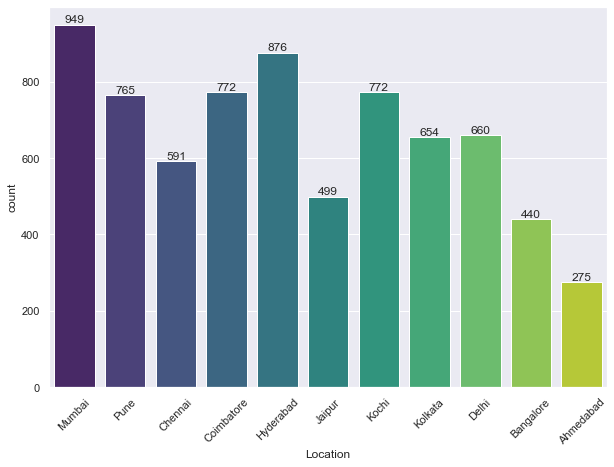

<IPython.core.display.Javascript object>

In [31]:
# countplot of Location
plt.figure(figsize=(10, 7))
sns.set(font_scale=1)
ax = sns.countplot(x="Location", data=df, palette="viridis")
ax.bar_label(ax.containers[0])
sns.set(font_scale=1)
plt.xticks(rotation=45)
plt.show()

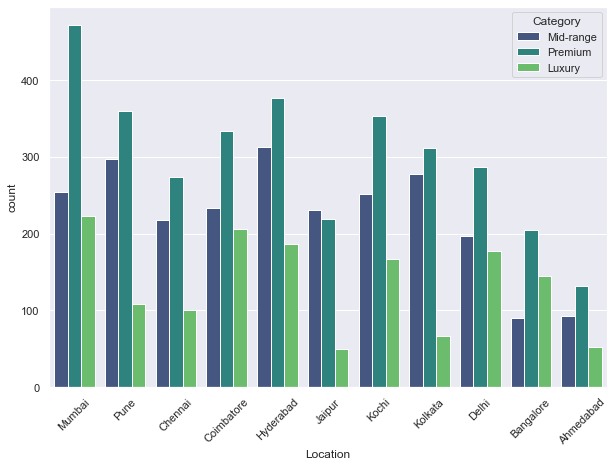

<IPython.core.display.Javascript object>

In [32]:
# countplot of Location split by Category
plt.figure(figsize=(10, 7))
sns.set(font_scale=1)
ax = sns.countplot(x="Location", data=df, hue="Category", palette="viridis")
sns.set(font_scale=1)
plt.xticks(rotation=45)
plt.show()

##### <span style="color:blue">Observations</span>
1. Maruti is the highest sold car brand. 
2. Premium cars, originally priced between 10 & 30Lakhs, are the most sold car category. 
3. Mumbai and Pune are hotspots for car sales whereas Ahmedabad sales are the least. But in almost locations, Premium cars are sold the most, validating the previous observation. The only exception is Jaipur, where Mid-range car sales slightly surpassed Premium cars. 
4. Most cars sold are owned first-hand. 
5. Manual transmission cars are more frequently sold.
6. In the Mid-range category, Petrol cars are popular, whereas in Premium and Luxury categories, Diesel cars are sold more frequently. 
7. Buyers are willing to buy Premium cars more, even if they have been owned multiple times

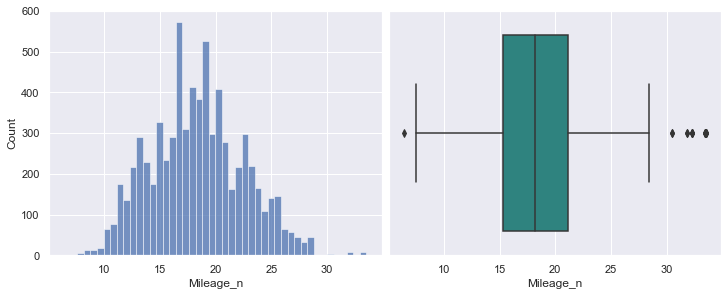

<IPython.core.display.Javascript object>

In [33]:
# plot histplot and boxplot on variable Mileage
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Mileage_n")
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Mileage_n", palette="viridis")
plt.show()

 ##### <span style="color:blue">Observations</span>
 1. The histogram for Mileage is almost normally distributed, but has a few outliers. 
 2. The Median value of Mileage lies around 17.0.

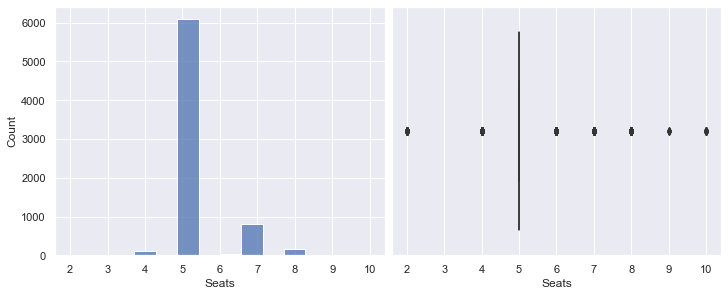

<IPython.core.display.Javascript object>

In [34]:
# plot histplot and boxplot on variable Seats
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Seats")
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Seats", palette="viridis")
plt.show()

 ##### <span style="color:blue">Observations</span>
 1. The histogram for Seats has many outliers on both sides, but they do not seem like actual outliers. It is possible to have vans with more than 7 seat capacities and coupes with 2 seaters. We can treat this as actual data, instead of treating as outliers
 2. The Median value of Seats lies at 5.0.

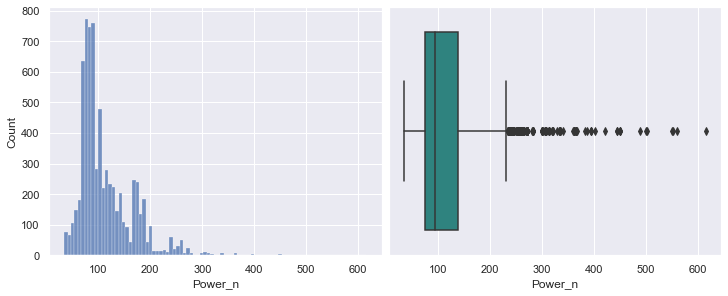

<IPython.core.display.Javascript object>

In [35]:
# plot histplot and boxplot on variable Power
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Power_n")
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Power_n", palette="viridis")
plt.show()

 ##### <span style="color:blue">Observations</span>
 1. The distribution for Power is highly right skewed with many outliers. 
 2. The median value of Power lies around 99.0. 

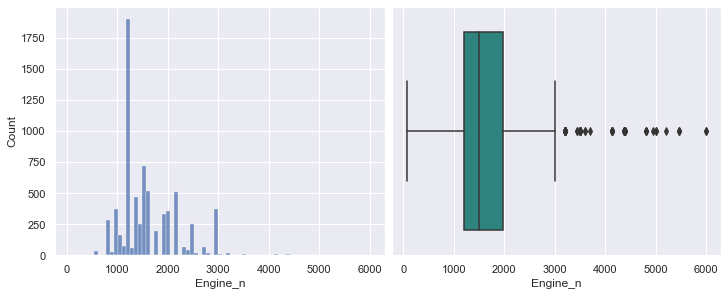

<IPython.core.display.Javascript object>

In [36]:
# plot histplot and boxplot on variable Engine
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Engine_n")
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Engine_n", palette="viridis")
plt.show()

##### <span style="color:blue">Observations</span>
1. The distribution for Engine is highly right skewed with many outliers.
2. The median value of Engine lies around 1400.0.

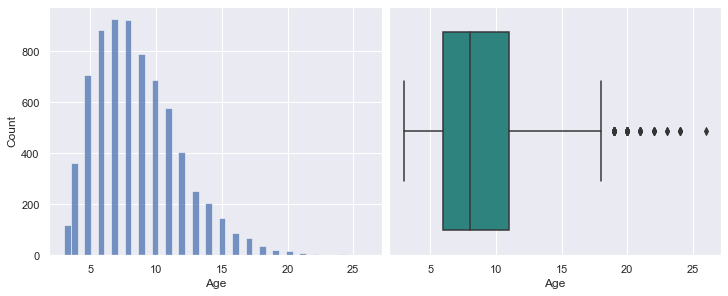

<IPython.core.display.Javascript object>

In [37]:
# plot histplot and boxplot on variable Age
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Age")
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Age", palette="viridis")
plt.show()

##### <span style="color:blue">Observations</span>
1. The distribution for Age is highly right skewed with many outliers.
2. The median value of Age lies around 7.0.

<a id='Kilometers_Driven'></a>

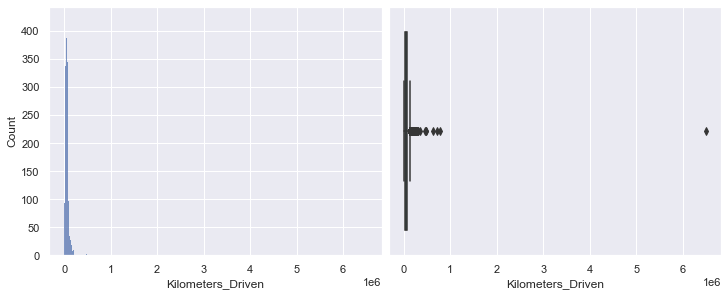

<IPython.core.display.Javascript object>

In [38]:
# plot histplot and boxplot on variable Kilometers_Driven
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Kilometers_Driven")
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Kilometers_Driven", palette="viridis")
plt.show()

##### <span style="color:blue">Observations</span>
1. The Kilometers_Driven graph is also right distributed with many outliers. 
2. The median value lies around 100,000 kilometers. 

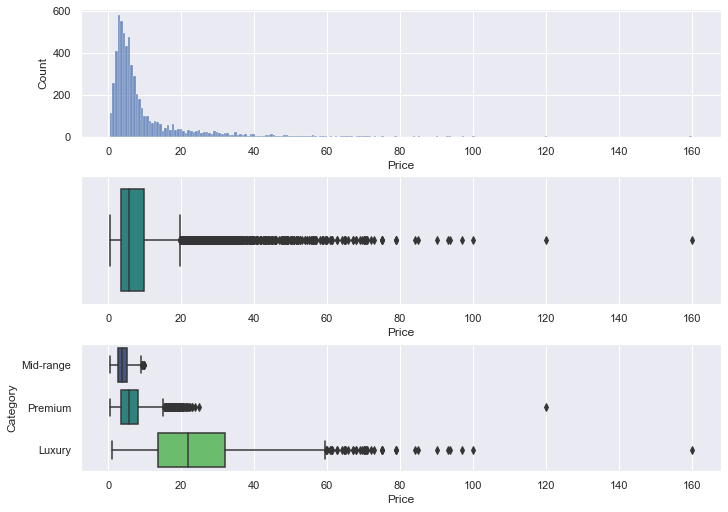

<IPython.core.display.Javascript object>

In [39]:
# plot histplot and boxplot on variable Price
fig, ax = plt.subplots(1, 2, figsize=(10, 7), constrained_layout=True)
plt.subplot(3, 1, 1)
sns.histplot(data=df, x="Price")
plt.subplot(3, 1, 2)
sns.boxplot(data=df, x="Price", palette="viridis")
plt.subplot(3, 1, 3)
sns.boxplot(data=df, x="Price", y="Category", palette="viridis")
plt.show()

##### <span style="color:blue">Observations</span>
1. Used car price is highly right skewed, with many outliers. 
2. The highest price is 160.0 lakhs, but since it is for Luxury cars, this outlier seems justified. 

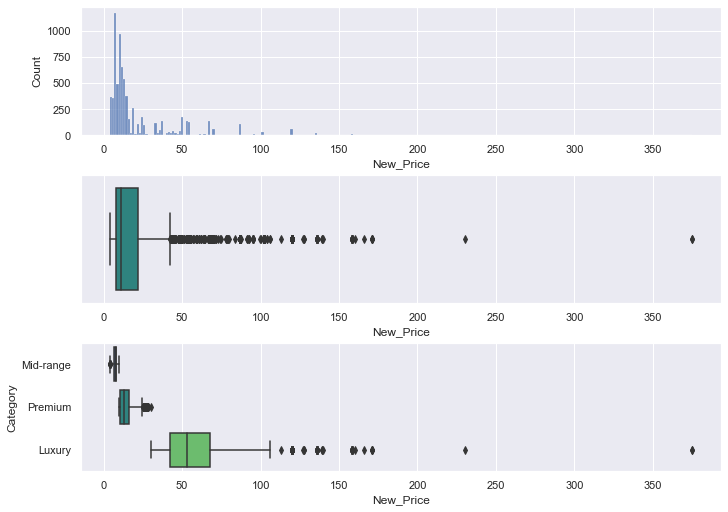

<IPython.core.display.Javascript object>

In [40]:
# plot histplot and boxplot on variable New_Price
fig, ax = plt.subplots(1, 2, figsize=(10, 7), constrained_layout=True)
plt.subplot(3, 1, 1)
sns.histplot(data=df, x="New_Price")
plt.subplot(3, 1, 2)
sns.boxplot(data=df, x="New_Price", palette="viridis")
plt.subplot(3, 1, 3)
sns.boxplot(data=df, x="New_Price", y="Category", palette="viridis")
plt.show()

##### <span style="color:blue">Observations</span>
1. New car price is highly right skewed, with many outliers. 
2. The highest price is 3.5 crores, but since it is for Luxury cars, this outlier seems justified.

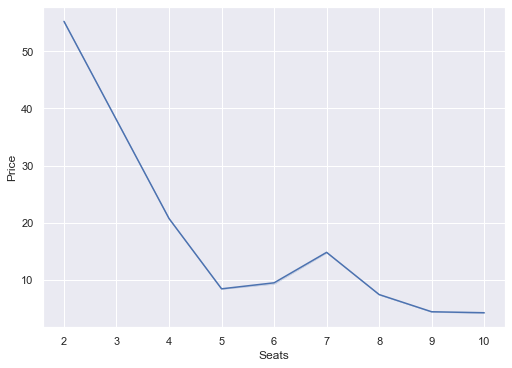

<IPython.core.display.Javascript object>

In [41]:
# plot lineplot on variable Price vs Seats
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
sns.lineplot(data=df, y="Price", x="Seats", ci=False)
plt.show()

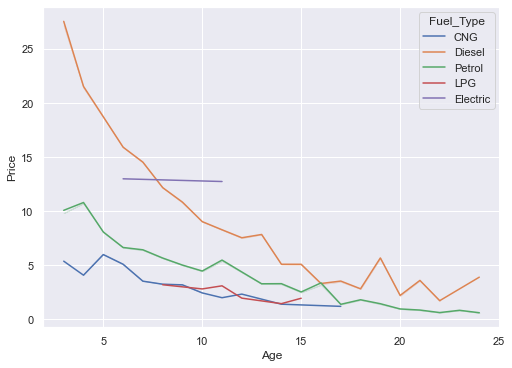

<IPython.core.display.Javascript object>

In [42]:
# plot lineplot on variable Price vs Age
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
sns.lineplot(data=df, y="Price", x="Age", hue="Fuel_Type", ci=False)
plt.show()

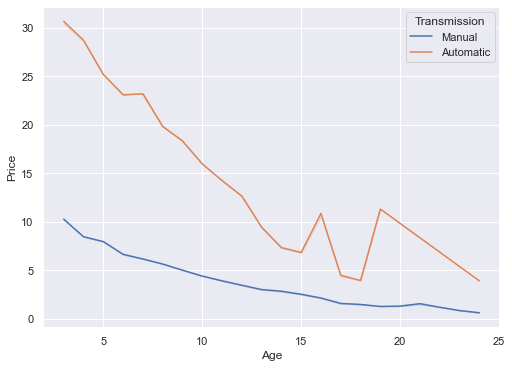

<IPython.core.display.Javascript object>

In [43]:
# plot lineplot on variable Price vs Age
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
sns.lineplot(data=df, y="Price", x="Age", hue="Transmission", ci=False)
plt.show()

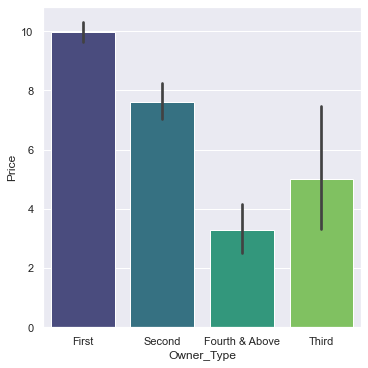

<IPython.core.display.Javascript object>

In [44]:
# plot barplot on variable Price vs Owner Type
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.barplot(data=df, y="Price", x="Owner_Type", palette="viridis")
plt.show()

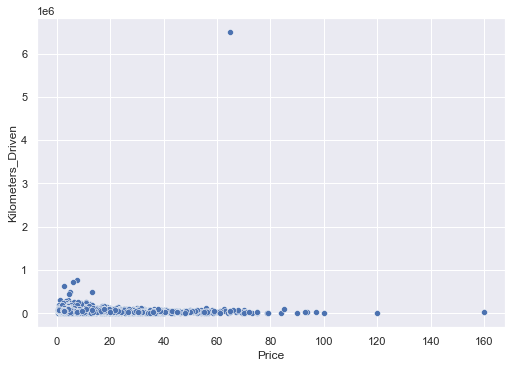

<IPython.core.display.Javascript object>

In [45]:
# plot scatterplot on variable Price vs Kilometers Driven
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
sns.scatterplot(data=df, x="Price", y="Kilometers_Driven")
plt.show()

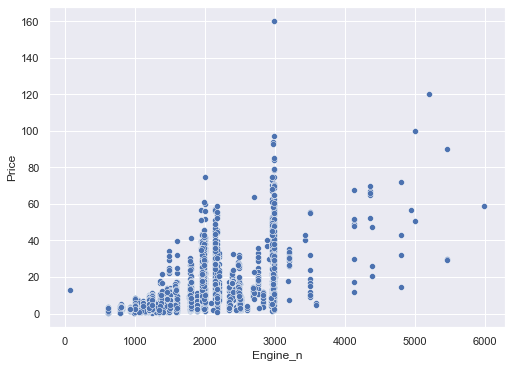

<IPython.core.display.Javascript object>

In [46]:
# plot scatterplot on variable Price vs Engine
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
sns.scatterplot(data=df, y="Price", x="Engine_n")
plt.show()

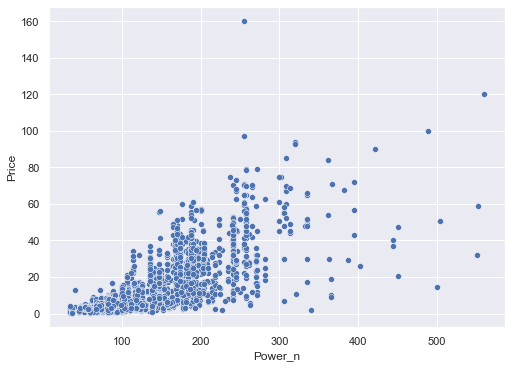

<IPython.core.display.Javascript object>

In [47]:
# plot scatterplot on variable Price vs Power
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
sns.scatterplot(data=df, y="Price", x="Power_n")
plt.show()

##### <span style="color:blue">Observations</span>
1. 2 seater coupes are highly priced, followed by 5-7 seater cars.
2. For cars of the same age, automatic transmission cars are higher priced.
3. Irrespective of the fuel_type, prices of car decline as they age. However, for cars of the same age, Diesel vehicles are highly priced than Petrol vehicles.
4. Prices decreases as number of owner increases.
5. Kilometers_Driven does not seem to have an effect on price.
6. As Engine capacity and Power increases, price also increases. 

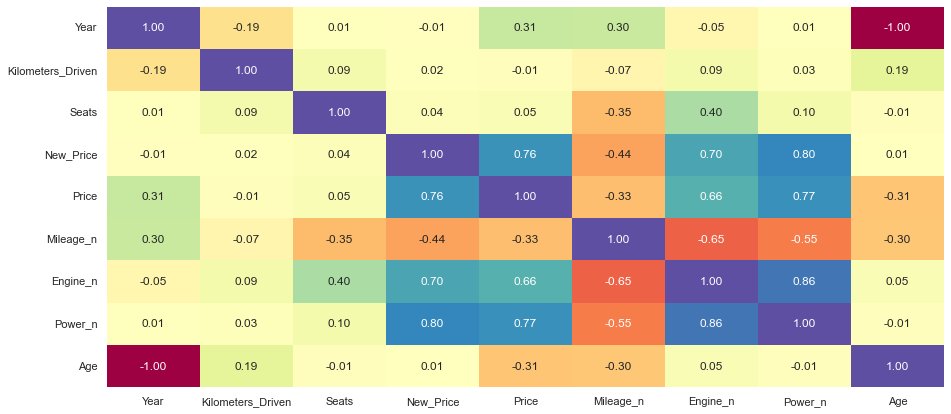

<IPython.core.display.Javascript object>

In [48]:
# plotting heatmap to understand correlations
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", cbar=False
)
plt.show()

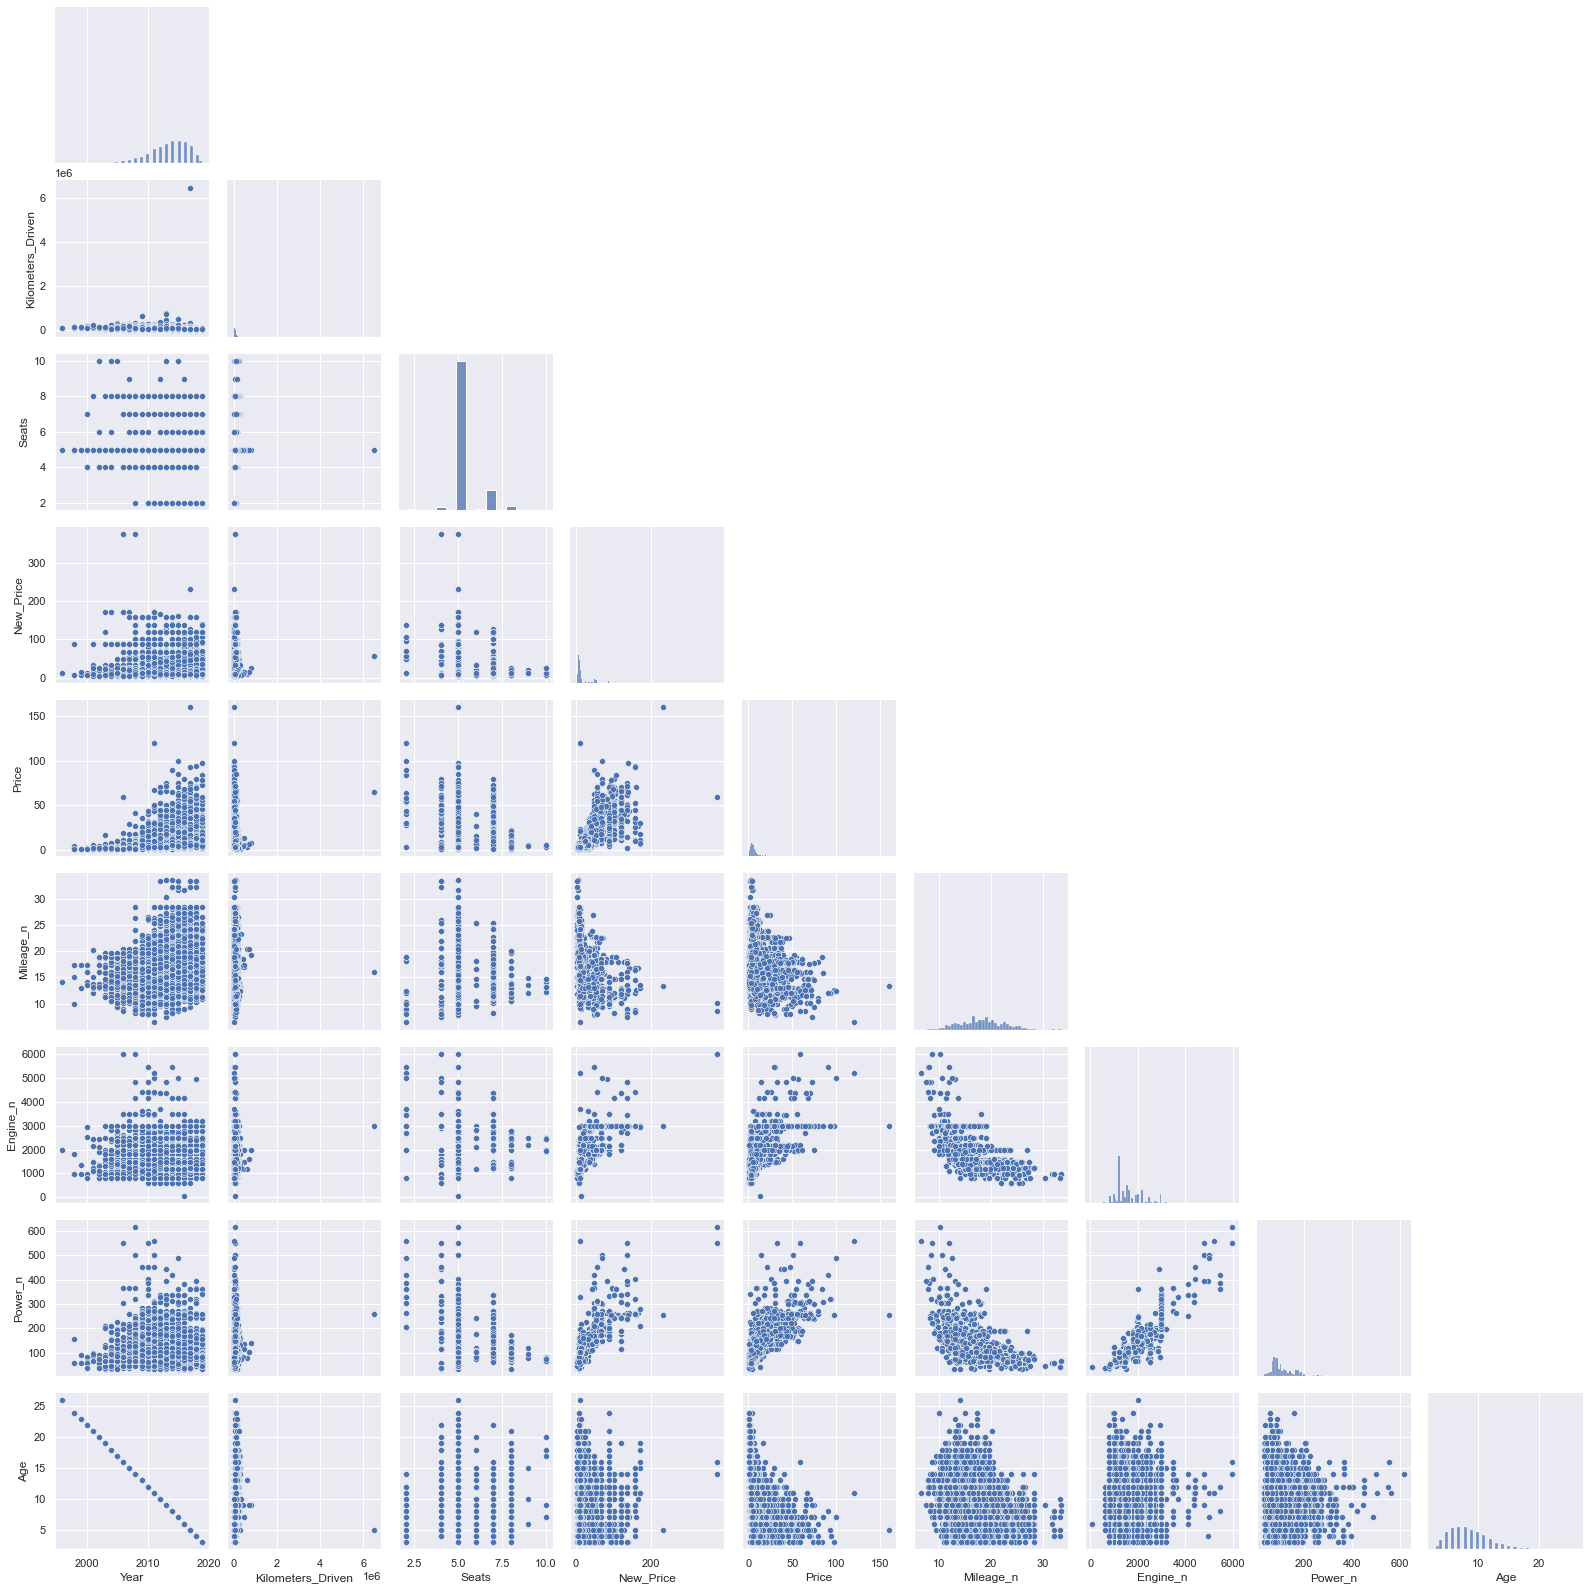

<IPython.core.display.Javascript object>

In [49]:
# plotting the pairplot
sns.pairplot(data=df, corner=True)
plt.show()

##### <span style="color:blue">Observations</span>
1. Used car price is positively correlated to factors like New_Price, Engine and Power, whereas it is negatively correlated to the Age of the car and Mileage. 
2. New_Price is positively correlated to Power, Engine and used car Price, and negatively correlated to Mileage. 
3. Mileage has a negative correlation with Power, Engine, Seats, Price and New_Price. 
4. Kilometers_Driven does not seem to have a significant correlation with any of the parameters. 

 ### Handling missing values
 Now that we know the distributions of the different data points, we can take a few steps to handle the missing data. 

In [50]:
# checking null values
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power_n               175
Mileage_n              83
Engine_n               46
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price               0
Brand                   0
Model                   0
Age                     0
Category                0
dtype: int64

<IPython.core.display.Javascript object>

In [51]:
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f"For the rows with exactly {n} missing values, NAs are found in:")
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print("\n\n")

For the rows with exactly 1 missing values, NAs are found in:
Price        1195
Mileage_n      31
Power_n        79
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Price        24
Mileage_n    35
Engine_n     25
Power_n      70
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Price        14
Mileage_n    16
Engine_n     20
Power_n      25
dtype: int64



For the rows with exactly 4 missing values, NAs are found in:
Price        1
Mileage_n    1
Engine_n     1
Power_n      1
dtype: int64





<IPython.core.display.Javascript object>

There are four missing values in this dataframe - Price, Power, Engine and Mileage. 
Of this, except for Mileage, all other data are right skewed with outliers. Mileage is almost normally distributed, but it also has outliers. So the treatment process will be like following:
- Engine: Since the graph is right skewed, we can impute the missing values with median. Engines differ by Brand, Model and the Year. We can groupby these values and the fill with the median of the group. If missing values perist, we will discard each paramater step by step and continue with grouping and imputing the median of the group. 
- Mileage: Missing values will be imputed with median, since they have a normal distribution but has outliers. Mileage depends on the Brand, Model, Engine and Fuel Type. We can groupby these parameters and fill the missing value by the median of the group. 
- Power: Again, this is a right skewed graph with outliers, so we can impute missing values with median. Power depends on Brand, Model and Engine. We will group by these variables and impute the median of the group. 
- Price: Price varies with Brand and Year. We will impute with median since this is a right skewed histogram with outliers. 

In [52]:
# visualizing a sample of the grouping by Brand, Model & Year for median values for Engine

df.groupby(["Brand", "Model", "Year"])["Engine_n"].median().head(30)

Brand       Model                                     Year
Ambassador  Classic Nova Diesel                       2003    1489.0
Audi        A3 35 TDI Attraction                      2014    1968.0
            A3 35 TDI Premium                         2016    1968.0
            A3 35 TDI Premium Plus                    2015    1968.0
                                                      2016    1968.0
            A3 35 TDI Technology                      2017    1968.0
            A4 1.8 TFSI                               2010    1781.0
                                                      2011    1781.0
            A4 1.8 TFSI Technology Edition            2012    1798.0
            A4 2.0 TDI                                2009    1968.0
                                                      2011    1968.0
                                                      2012    1968.0
                                                      2013    1968.0
                                            

<IPython.core.display.Javascript object>

In [53]:
# filling missing values for Engine
df["Engine_n"] = df.groupby(["Brand", "Model", "Year"])["Engine_n"].apply(
    lambda x: x.fillna(x.median())
)

# checking for missing values again
df[df["Engine_n"].isnull()].shape

(45, 16)

<IPython.core.display.Javascript object>

In [54]:
# there are still missing values for Engine
# dropping the Year for a more broader grouping and applying the median of the group.
df["Engine_n"] = df.groupby(["Brand", "Model"])["Engine_n"].apply(
    lambda x: x.fillna(x.median())
)

# checking for missing values again
df[df["Engine_n"].isnull()].shape

(40, 16)

<IPython.core.display.Javascript object>

In [55]:
# there are still missing values for Engine
# dropping the Model for a more broader grouping and applying the median of the group.
df["Engine_n"] = df.groupby(["Brand"])["Engine_n"].apply(lambda x: x.fillna(x.median()))

# checking for missing values again
df[df["Engine_n"].isnull()].shape

(0, 16)

<IPython.core.display.Javascript object>

In [56]:
# Power depends on Brand and Model and the Engine
# grouping by these parameters to fill na with the median of the group
df.groupby(["Brand", "Model", "Engine_n"])["Power_n"].median().head(30)

Brand       Model                                     Engine_n
Ambassador  Classic Nova Diesel                       1489.0       35.50
Audi        A3 35 TDI Attraction                      1968.0      143.00
            A3 35 TDI Premium                         1968.0      143.00
            A3 35 TDI Premium Plus                    1968.0      143.00
            A3 35 TDI Technology                      1968.0      143.00
            A4 1.8 TFSI                               1781.0      163.20
            A4 1.8 TFSI Technology Edition            1798.0      167.62
            A4 2.0 TDI                                1968.0      147.51
            A4 2.0 TDI 177 Bhp Premium Plus           1968.0      174.33
            A4 2.0 TDI 177 Bhp Technology Edition     1968.0      174.33
            A4 2.0 TDI Celebration Edition            1968.0      147.51
            A4 2.0 TDI Multitronic                    1968.0      140.00
            A4 2.0 TDI Premium Sport Limited Edition  1968.0 

<IPython.core.display.Javascript object>

In [57]:
# filling na with the median of the group
df["Power_n"] = df.groupby(["Brand", "Model", "Engine_n"])["Power_n"].apply(
    lambda x: x.fillna(x.median())
)

# checking for null values
df[df["Power_n"].isnull()].shape

(136, 16)

<IPython.core.display.Javascript object>

In [58]:
# there are still missing values for Power
# dropping the Engine for a more broader grouping and applying the median of the group.
df["Power_n"] = df.groupby(["Brand", "Model"])["Power_n"].apply(
    lambda x: x.fillna(x.median())
)

# checking for null values
df[df["Power_n"].isnull()].shape

(136, 16)

<IPython.core.display.Javascript object>

In [59]:
# there are still missing values for Power
# dropping the Engine for a more broader grouping and applying the median of the group.

df["Power_n"] = df.groupby(["Brand", "Year"])["Power_n"].apply(
    lambda x: x.fillna(x.median())
)

# checking for null values
df[df["Power_n"].isnull()].shape

(19, 16)

<IPython.core.display.Javascript object>

In [60]:
# there are still missing values for Power
# dropping the Model for a more broader grouping and applying the median of the group.
df["Power_n"] = df.groupby(["Brand"])["Power_n"].apply(lambda x: x.fillna(x.median()))

# checking for null values
df[df["Power_n"].isnull()].shape

(2, 16)

<IPython.core.display.Javascript object>

In [61]:
# checking the rows which have an empty value for Power
df[df["Power_n"].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Brand,Model,Mileage_n,Engine_n,Power_n,Age,Category
915,Pune,2008,103000,Diesel,Automatic,Second,2.0,11.3,3.0,Smart,Fortwo CDI AT,NaN,799.0,NaN,14,Premium
6216,Pune,1996,65000,Diesel,Manual,Second,5.0,11.3,NaN,Hindustan,Motors Contessa 2.0 DSL,14.1,1995.0,NaN,26,Premium


<IPython.core.display.Javascript object>

In [62]:
# the Power values for the two cars - Smart ForTwo and Hindustan Motors Contessa- can be researched in Google and can be applied here.
df.loc[6216, "Power_n"] = 54.25
df.loc[915, "Power_n"] = 44.38

df[df["Power_n"].isnull()].shape

(0, 16)

<IPython.core.display.Javascript object>

In [63]:
# filling missing values for Mileage
# Mileage is almost normally distributed with outliers, so median can be used to fill the missing values
# Mileage depends on the Brand, Model, Engine and Fuel Type. We can groupby these parameters and fill the missing value by the median of the group.

# visualizing a sample of the grouping
df.groupby(["Brand", "Model", "Engine_n", "Fuel_Type"])["Mileage_n"].median().sample(
    n=10
)

Brand        Model                                 Engine_n  Fuel_Type
Maruti       Alto K10 2010-2014 VXI                998.0     Petrol       20.920
Porsche      Cayenne Diesel                        2967.0    Diesel       15.150
Mahindra     Scorpio 2009-2014 VLX 4WD AT 7S BSIV  2179.0    Diesel       11.790
Maruti       Ciaz ZXi Option                       1373.0    Petrol       20.730
Skoda        Superb 1.8 TFSI MT                    1798.0    Petrol       13.140
Lamborghini  Gallardo Coupe                        5204.0    Petrol        6.400
Maruti       Ertiga VDI Limited Edition            1248.0    Diesel       20.770
Skoda        Rapid 1.5 TDI Ambition                1498.0    Diesel       21.135
Hyundai      Elite i20 Magna Plus                  1197.0    Petrol       18.600
Ford         Ikon 1.3 Flair                        1299.0    Petrol       13.800
Name: Mileage_n, dtype: float64

<IPython.core.display.Javascript object>

In [64]:
# filling Mileage by median of the group
# verifying null counts after filling

df["Mileage_n"] = df.groupby(["Brand", "Model", "Engine_n", "Fuel_Type"])[
    "Mileage_n"
].apply(lambda x: x.fillna(x.median()))
df[df["Mileage_n"].isnull()].shape

(80, 16)

<IPython.core.display.Javascript object>

In [65]:
# filling Mileage by median of the group
# verifying null counts after filling

df["Mileage_n"] = df.groupby(["Brand", "Model"])["Mileage_n"].apply(
    lambda x: x.fillna(x.median())
)
df[df["Mileage_n"].isnull()].shape

(80, 16)

<IPython.core.display.Javascript object>

In [66]:
# null values persist, so dropping the parameters and applying median of the broader group.
df["Mileage_n"] = df.groupby(["Brand"])["Mileage_n"].apply(
    lambda x: x.fillna(x.median())
)

# verifying the null values
df[df["Mileage_n"].isnull()].shape

(1, 16)

<IPython.core.display.Javascript object>

In [67]:
# verifying the details of the row which has Mileage as null
df[df["Mileage_n"].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Brand,Model,Mileage_n,Engine_n,Power_n,Age,Category
915,Pune,2008,103000,Diesel,Automatic,Second,2.0,11.3,3.0,Smart,Fortwo CDI AT,NaN,799.0,44.38,14,Premium


<IPython.core.display.Javascript object>

In [68]:
# verifying the Mileage of Smart ForTwo through Google research
df.loc[915, "Mileage_n"] = 17.00
df[df["Mileage_n"].isnull()].shape

(0, 16)

<IPython.core.display.Javascript object>

In [69]:
# Price of a car depends on the Brand, Model and Year
# filling nulls by applying the median of the group
# if nulls persist, dropping each parameter step by step and applying median of the group

df["Price"] = df.groupby(["Brand", "Model", "Year"])["Price"].apply(
    lambda x: x.fillna(x.median())
)
df[df["Price"].isnull()].shape

(555, 16)

<IPython.core.display.Javascript object>

In [70]:
# broadening the group to apply the median

df["Price"] = df.groupby(["Brand", "Model"])["Price"].apply(
    lambda x: x.fillna(x.median())
)
df[df["Price"].isnull()].shape

(178, 16)

<IPython.core.display.Javascript object>

In [71]:
# null values persists, broadening the group again

df["Price"] = df.groupby(["Brand"])["Price"].apply(lambda x: x.fillna(x.median()))
df[df["Price"].isnull()].shape

(2, 16)

<IPython.core.display.Javascript object>

In [72]:
# applying the median by grouping by year
df["Price"] = df.groupby(["Year"])["Price"].apply(lambda x: x.fillna(x.median()))
df[df["Price"].isnull()].shape

df[df["Price"].isnull()].shape

(1, 16)

<IPython.core.display.Javascript object>

In [73]:
# since null persists, we will fill by median of the column Price

df["Price"] = df["Price"].fillna(df["Price"].median())
df[df["Price"].isnull()].shape

(0, 16)

<IPython.core.display.Javascript object>

In [74]:
# As we move into modelling, we can drop the 'Year' column since we have the more meaningful 'Age' column.
# We retained the 'Year' column so far only because it was handy in treatments of missing values.
df.drop("Year", axis=1, inplace=True)
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Brand,Model,Mileage_n,Engine_n,Power_n,Age,Category
0,Mumbai,72000,CNG,Manual,First,5.0,5.51,1.75,Maruti,Wagon R LXI CNG,26.60,998.0,58.16,12,Mid-range
1,Pune,41000,Diesel,Manual,First,5.0,16.06,12.50,Hyundai,Creta 1.6 CRDi SX Option,19.67,1582.0,126.20,7,Premium
2,Chennai,46000,Petrol,Manual,First,5.0,8.61,4.50,Honda,Jazz V,18.20,1199.0,88.70,11,Mid-range
3,Chennai,87000,Diesel,Manual,First,7.0,11.27,6.00,Maruti,Ertiga VDI,20.77,1248.0,88.76,10,Premium
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,53.14,17.74,Audi,A4 New 2.0 TDI Multitronic,15.20,1968.0,140.80,9,Luxury


<IPython.core.display.Javascript object>

### Handling Outliers
After visualizing our graphs, we have seen certain cases of outliers in our dataset:
 1. The maximum value of Kilometers_Driven is 65Lakhs, which is very high and unusual. 
 2. Maximum price of used cars is 160Lakhs and new cars is 3.5 crores. 
 3. There are cars with seats greater than 7.0, which also seems very unusual.
 4. Engine, Mileage and Power also seems to have outliers. 
 
We will need to investigate whether these are indeed outliers or valid cases. 

##### Kilometers_Driven
We have already plotted the histogram and boxplot of this datapoint. The histogram is right skewed and the boxplot has many outliers to the right.

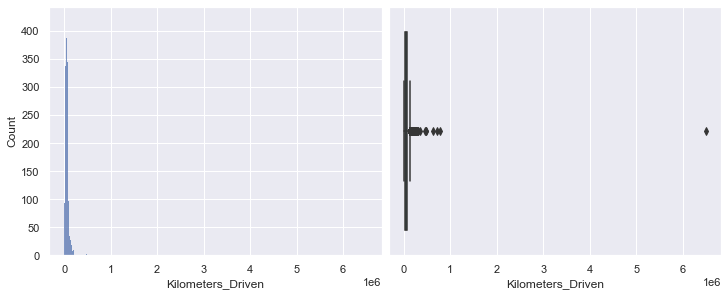

<IPython.core.display.Javascript object>

In [75]:
# plot histplot and boxplot on variable Kilometers_Driven
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Kilometers_Driven")
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Kilometers_Driven", palette="viridis")
plt.show()

In [76]:
# calculating the Q1,Q3 and 4*IQR values for Kilometers_Driven

quartiles = np.quantile(
    df["Kilometers_Driven"][df["Kilometers_Driven"].notnull()], [0.25, 0.75]
)
Kilometers_Driven_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Kilometers_Driven_4iqr}")

# consolidating outlier values separately
outlier_Kilometers_Driven = df.loc[
    np.abs(df["Kilometers_Driven"] - df["Kilometers_Driven"].median())
    > Kilometers_Driven_4iqr,
    "Kilometers_Driven",
]

# printing the min & max values in the outliers
print(outlier_Kilometers_Driven.min())
print(outlier_Kilometers_Driven.max())

Q1 = 34000.0, Q3 = 73000.0, 4*IQR = 156000.0
210000
6500000


<IPython.core.display.Javascript object>

In [77]:
# verifying what brands and models correspond to the outliers.
# with more age on the cars, it is possible that the car could have driven more kilometers
km_outliers = df[
    df["Kilometers_Driven"] >= outlier_Kilometers_Driven.min()
].sort_values("Kilometers_Driven", ascending=False)
km_outliers.loc[:, ["Kilometers_Driven", "Age", "Brand", "Model"]].head(15)

,Kilometers_Driven,Age,Brand,Model
2328,6500000,5,BMW,X5 xDrive 30d M Sport
340,775000,9,Skoda,Octavia Ambition Plus 2.0 TDI AT
1860,720000,9,Volkswagen,Vento Diesel Highline
358,620000,13,Hyundai,i10 Magna 1.2
3092,480000,7,Honda,City i VTEC SV
2823,480000,7,Volkswagen,Jetta 2013-2015 2.0L TDI Highline AT
4491,445000,9,Hyundai,i20 Magna Optional 1.2
6921,350000,10,Maruti,Swift Dzire Tour LDI
3649,300000,14,Tata,Indigo LS
1528,299322,17,Toyota,Innova 2.5 G (Diesel) 8 Seater BS IV


<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>
1. From Google research on cars, we can understand that with good maintenance and no history of accidents, most cars can last upto 600,000 kms over a span of 10-15 years. Therefore really high kilometeres over a long period of time does not seem like an outlier. (There are Skoda cars that have clocked 8,00,000 - 9,00,000 kilometers over a span of 10 years.)
2. However, 6.5 million kilometers on a car seems highly unlikely especially for a car that ran for only 5 years. 
3. We can decide to drop this row, as there is only one such case like this. 

In [78]:
df[df["Kilometers_Driven"] == 6500000]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Brand,Model,Mileage_n,Engine_n,Power_n,Age,Category
2328,Chennai,6500000,Diesel,Automatic,First,5.0,55.07,65.0,BMW,X5 xDrive 30d M Sport,15.97,2993.0,258.0,5,Luxury


<IPython.core.display.Javascript object>

In [79]:
# dropping the row from the dataframe
df.drop(df[df["Kilometers_Driven"] == 6500000].index, inplace=True)

# verifying the drop
df[df["Kilometers_Driven"] == 6500000]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Brand,Model,Mileage_n,Engine_n,Power_n,Age,Category


<IPython.core.display.Javascript object>

##### Age

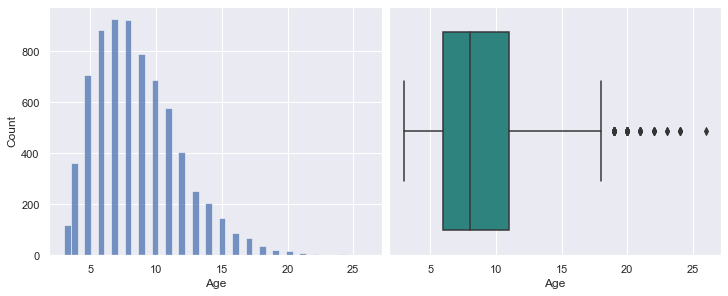

<IPython.core.display.Javascript object>

In [80]:
# plot histplot and boxplot on variable Age
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Age")
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Age", palette="viridis")
plt.show()

##### <span style="color:blue">Observations</span>
1. Even though the graph marks anything above 17 as an outlier, we know that cars with 20 years are not unusual in the market.  If they are Premium cars, they are called as "Classic". 

##### Mileage

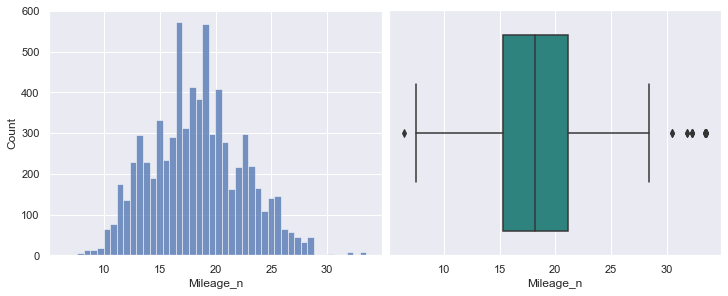

<IPython.core.display.Javascript object>

In [81]:
# plot histplot and boxplot on variable Mileage
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Mileage_n")
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Mileage_n", palette="viridis")
plt.show()

Taking a sample of cars with Mileage less than 10 and greater than 27 to verify whether they are indeed outliers

In [82]:
df[df["Mileage_n"] < 10.0].sample(n=5)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Brand,Model,Mileage_n,Engine_n,Power_n,Age,Category
3328,Mumbai,66000,Diesel,Automatic,Second,5.0,49.49,10.75,Mercedes-Benz,M-Class ML 320 CDI,8.7,2987.0,224.34,13,Luxury
2978,Coimbatore,42400,Petrol,Automatic,Third,4.0,136.00,42.91,Porsche,Panamera 2010 2013 4S,8.0,4806.0,394.30,12,Luxury
6386,Coimbatore,67038,Petrol,Automatic,First,5.0,11.33,3.25,Nissan,Teana 230jM,9.1,2349.0,84.80,13,Premium
4001,Mumbai,42000,Petrol,Manual,First,5.0,13.58,6.25,Honda,Accord 2.4 Inspire M/T,9.8,2354.0,180.00,10,Premium
70,Mumbai,73000,Petrol,Automatic,First,5.0,136.00,14.50,Porsche,Cayenne 2009-2014 Turbo,8.5,4806.0,500.00,14,Luxury


<IPython.core.display.Javascript object>

In [83]:
df[df["Mileage_n"] > 27.0].sample(n=5)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Brand,Model,Mileage_n,Engine_n,Power_n,Age,Category
5265,Hyderabad,62000,Diesel,Manual,First,5.0,7.88,6.30,Maruti,Swift VDI,28.40,1248.0,74.00,7,Mid-range
1467,Chennai,45000,Diesel,Manual,First,5.0,11.11,6.85,Maruti,Ciaz ZDi SHVS,28.09,1248.0,88.50,8,Premium
879,Hyderabad,5456,Diesel,Manual,First,5.0,7.88,8.65,Maruti,Swift DDiS ZDI Plus,28.40,1248.0,74.00,4,Mid-range
3040,Kochi,53500,Diesel,Manual,First,5.0,7.88,5.36,Maruti,Swift VDI,28.40,1248.0,74.00,7,Mid-range
2438,Hyderabad,110000,Diesel,Manual,First,5.0,9.14,4.00,Maruti,Dzire VDI,28.40,1248.0,73.75,11,Mid-range


<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>
1. It is common for Luxury sports models cars to have a lower mileage, and for economy family cars to have higher mileage. These values can be considered as actual data instead of as outliers.  


##### Engine

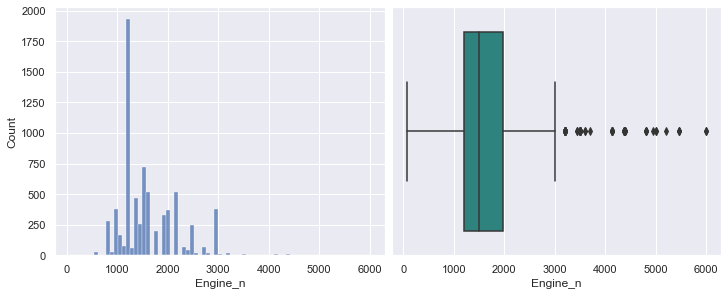

<IPython.core.display.Javascript object>

In [84]:
# plot histplot and boxplot on variable Engine
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Engine_n")
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Engine_n", palette="viridis")
plt.show()

##### <span style="color:blue">Observations</span>
800 to 6000CC is considered the usual range of Engine capacities. We can leave the outliers as it is and treat them as actual data. 

##### Power

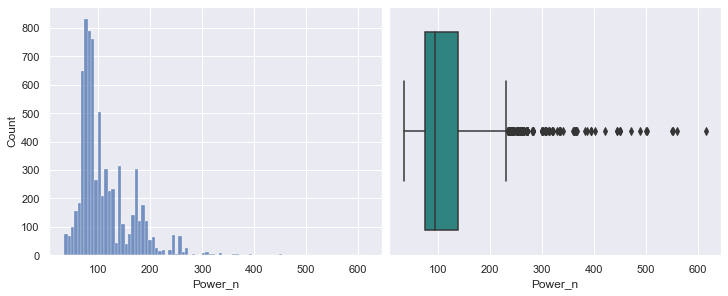

<IPython.core.display.Javascript object>

In [85]:
# plot histplot and boxplot on variable Power
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Power_n")
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Power_n", palette="viridis")
plt.show()

##### <span style="color:blue">Observations</span>
The most powerful car BMW sells is rated at 609 bhp, therefore values above 250bhp can be considered as actual data instead of as outliers.

##### Seats
Resurfacing the histograms and boxplots for seats here. 

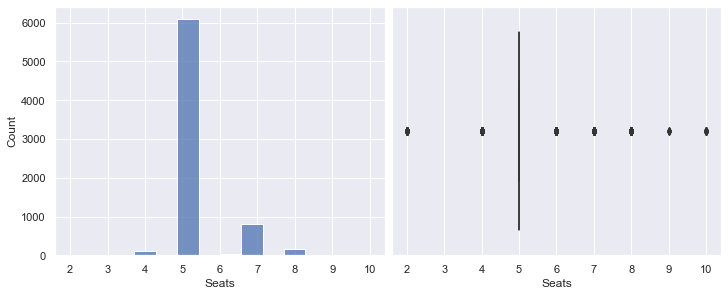

<IPython.core.display.Javascript object>

In [86]:
# plot histplot and boxplot on variable Seats
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Seats")
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Seats", palette="viridis")
plt.show()

##### <span style="color:blue">Observations</span>
1. The histogram for Seats has many outliers on both sides, but they do not seem like actual outliers. It is possible to have vans with more than 7 seat capacities and coupes with 2 seaters. We can treat this as actual data, instead of treating as outliers


##### Price

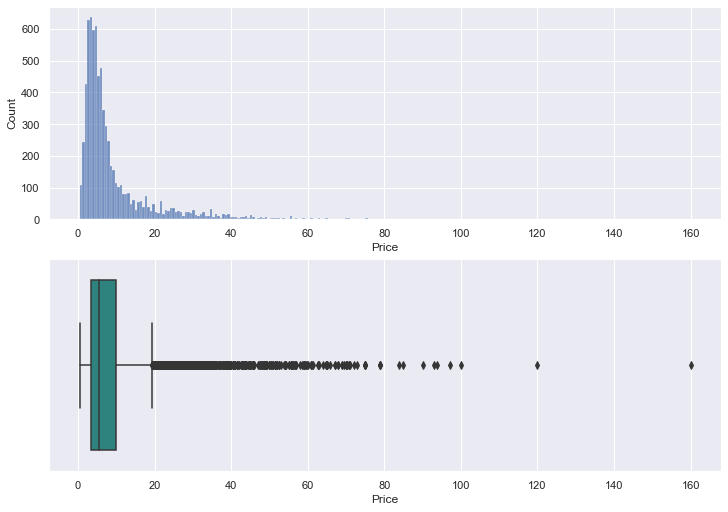

<IPython.core.display.Javascript object>

In [87]:
# plot histplot and boxplot on variable Price
fig, ax = plt.subplots(1, 2, figsize=(10, 7), constrained_layout=True)
plt.subplot(2, 1, 1)
sns.histplot(data=df, x="Price")
plt.subplot(2, 1, 2)
sns.boxplot(data=df, x="Price", palette="viridis")
plt.show()

##### <span style="color:blue">Observations</span>
1. The graph is heavily right skewed with many outliers.

In [88]:
# we can use the IQR method to identify the outliers

# calculating Q1, Q3 and 4*IQR
quartiles = np.quantile(df["Price"][df["Price"].notnull()], [0.25, 0.75])
Price_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Price_4iqr}")
outlier_Price = df.loc[
    np.abs(df["Price"] - df["Price"].median()) > Price_4iqr, "Price",
]

# verifying the min & max values of outliers
print(outlier_Price.min())
print(outlier_Price.max())

Q1 = 3.5, Q3 = 9.85, 4*IQR = 25.4
31.0
160.0


<IPython.core.display.Javascript object>

In [89]:
# analysing the original data source to understand the outliers better
Price_outliers = df[df["Price"] >= outlier_Price.min()].sort_values(
    "Price", ascending=False
)
Price_outliers.loc[:, ["New_Price", "Price", "Age", "Brand", "Model", "Category"]].head(
    15
)

,New_Price,Price,Age,Brand,Model,Category
4079,230.000,160.00,5,Land Rover,Rover Range Rover 3.0 Diesel LWB Vogue,Luxury
5781,11.300,120.00,11,Lamborghini,Gallardo Coupe,Premium
5919,69.675,100.00,7,Jaguar,F Type 5.0 V8 S,Luxury
1505,139.000,97.07,3,Land Rover,Rover Range Rover Sport SE,Luxury
1974,158.000,93.67,4,BMW,7 Series 740Li,Luxury
1984,158.000,93.00,5,BMW,7 Series 740Li,Luxury
4691,49.490,90.00,8,Mercedes-Benz,SLK-Class 55 AMG,Luxury
5535,55.070,85.00,7,BMW,X6 xDrive 40d M Sport,Luxury
2095,106.000,83.96,3,Mercedes-Benz,SLC 43 AMG,Luxury
1885,102.000,79.00,4,Mercedes-Benz,GLS 350d Grand Edition,Luxury


<IPython.core.display.Javascript object>

In [90]:
# we have noticed in some cases the used price exceeds the original price of the car.
# calculating the percentage of such instances.

Price_outliers[Price_outliers["New_Price"] < Price_outliers["Price"]].shape[
    0
] / df.shape[0] * 100

0.3033645890788748

<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>
1. The outliers in Price largely correspond to Luxury and Premium cars, which looks reasonable. 160Lakhs(1.6Cr) for a 5 year old Premium Land Rover is a reasonable price, especially considering its original price value of 2.3Cr. 
2. In some cases, we can see that used price exceeds the original price. While this seems like a deviation from the norm that car value depreciates over the years, research suggests several reasons for this:
- limited availability of new cars due to limited inventory & supply of parts. 
- custom enhancements on the used car surging the price of the car - like speed boosters, puddle lights, custom paint and seat covers.
3. The percentage of cars where used price exceed the original price is very low in the data set- ~0.3% only. 
4. For all these reasons, we can leave the outliers in Price here as it is and treat them as valid data. 
5. The New_Price column also indicates extreme values such as 2.3 Cr, but considering that a top-end Range Rover Vogue is 4.0Cr, we can retain these values as actual data.

### Variable Transformation
Depending on whether the distributions are skewed or not, we can decide whether to perform log transforms or not


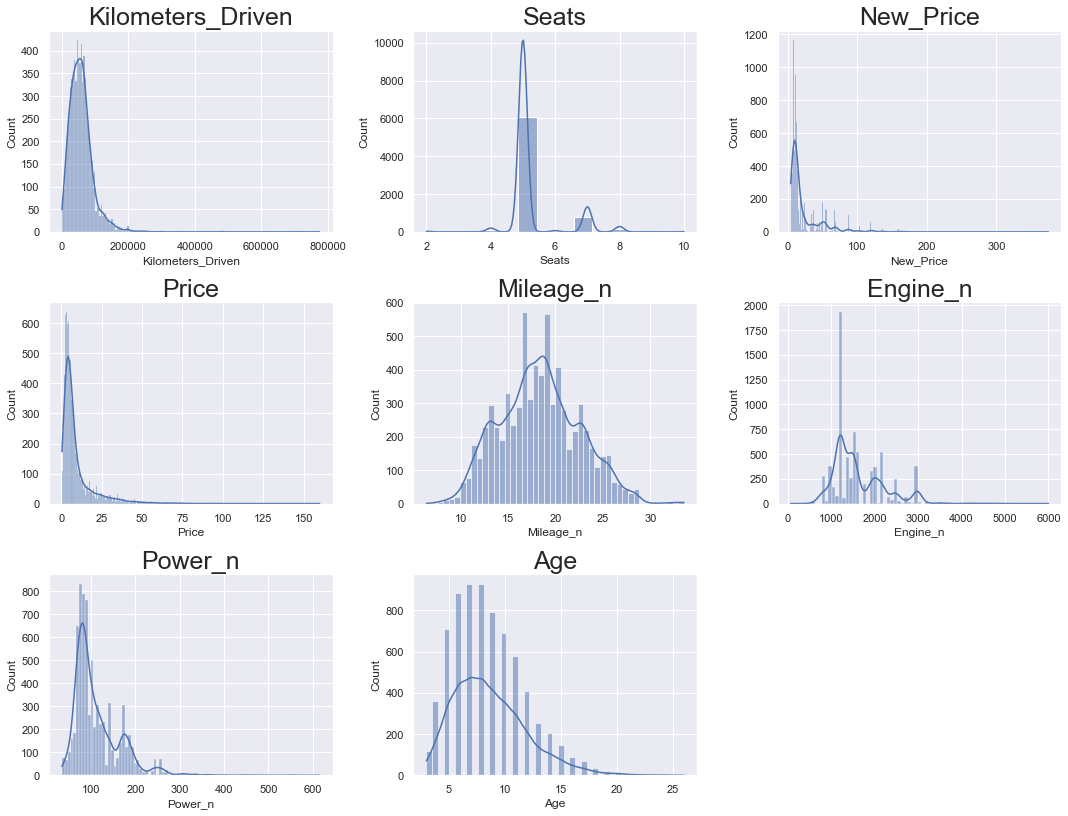

<IPython.core.display.Javascript object>

In [91]:
# collecting the numerical columns to plot histograms
nume_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 45))

for i in range(len(nume_cols)):
    plt.subplot(12, 3, i + 1)
    sns.histplot(data=df, x=nume_cols[i], kde=True)
    plt.tight_layout()
    plt.title(nume_cols[i], fontsize=25)

plt.show()

##### <span style="color:blue">Observations</span>
We can perform log transformations for the most skewed parameters like "Price", "New_Price" and "Kilometers_Driven".

In [92]:
# columns for which log transformation needs to be performed.
nume_cols_tolog = ["Kilometers_Driven", "New_Price", "Price"]

<IPython.core.display.Javascript object>

In [93]:
# define function to perform log transform


def nume_log_transform(df, col_log):
    """#Perform Log Transformation of dataframe , and list of columns """
    for colname in col_log:
        df[colname + "_log"] = np.log(df[colname])

    df.info()


# apply function to the dataframe
nume_log_transform(df, nume_cols_tolog)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               7252 non-null   object 
 1   Kilometers_Driven      7252 non-null   int64  
 2   Fuel_Type              7252 non-null   object 
 3   Transmission           7252 non-null   object 
 4   Owner_Type             7252 non-null   object 
 5   Seats                  7252 non-null   float64
 6   New_Price              7252 non-null   float64
 7   Price                  7252 non-null   float64
 8   Brand                  7252 non-null   object 
 9   Model                  7252 non-null   object 
 10  Mileage_n              7252 non-null   float64
 11  Engine_n               7252 non-null   float64
 12  Power_n                7252 non-null   float64
 13  Age                    7252 non-null   int64  
 14  Category               7252 non-null   object 
 15  Kilo

<IPython.core.display.Javascript object>


Verifying if the log transformations indeed helped in improving the distribution

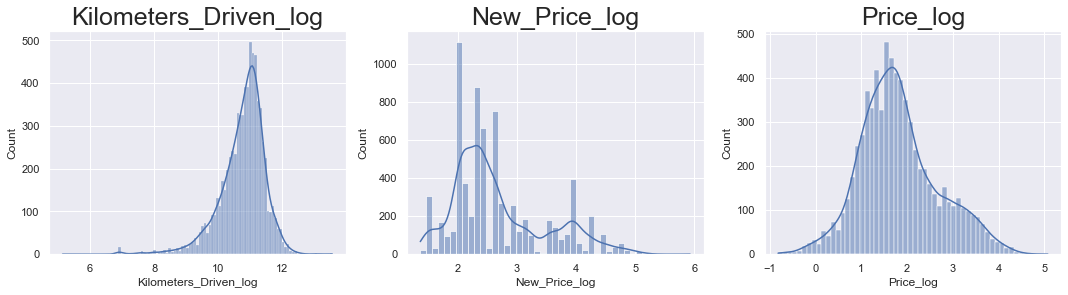

<IPython.core.display.Javascript object>

In [94]:
log_nume_cols = ["Kilometers_Driven_log", "New_Price_log", "Price_log"]

plt.figure(figsize=(15, 45))

for i in range(len(log_nume_cols)):
    plt.subplot(12, 3, i + 1)
    sns.histplot(data=df, x=log_nume_cols[i], kde=True)
    plt.title(log_nume_cols[i], fontsize=25)
    plt.tight_layout()

##### <span style="color:blue">Observations</span>
Log Transformations have improved distributions for Kilometers_Driven, New_Price and Price, we can proceed to use the log transformed variables. 

Before we proceed to model building, let us drop other columns, namely Brand and Model, which we will not need to build our models

In [95]:
df.drop(
    ["Brand", "Model"], axis=1, inplace=True,
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               7252 non-null   object 
 1   Kilometers_Driven      7252 non-null   int64  
 2   Fuel_Type              7252 non-null   object 
 3   Transmission           7252 non-null   object 
 4   Owner_Type             7252 non-null   object 
 5   Seats                  7252 non-null   float64
 6   New_Price              7252 non-null   float64
 7   Price                  7252 non-null   float64
 8   Mileage_n              7252 non-null   float64
 9   Engine_n               7252 non-null   float64
 10  Power_n                7252 non-null   float64
 11  Age                    7252 non-null   int64  
 12  Category               7252 non-null   object 
 13  Kilometers_Driven_log  7252 non-null   float64
 14  New_Price_log          7252 non-null   float64
 15  Pric

<IPython.core.display.Javascript object>

Going forward we will have two dataframes:
- df: this will contain the original dataframe, without any log transformed variables.
- df_log: this will contain the log transformed variables

This will help us in building separate regression models, one with the log transformed variables and another without. We can compare the performances of both models separately and determine which is better. 

In [96]:
# consolidating the log transformed variables in a separate dataframe.

df_log = df[
    [
        "Location",
        "Fuel_Type",
        "Transmission",
        "Owner_Type",
        "Kilometers_Driven_log",
        "Seats",
        "New_Price_log",
        "Price_log",
        "Mileage_n",
        "Engine_n",
        "Power_n",
        "Age",
        "Category",
    ]
]


<IPython.core.display.Javascript object>

In [97]:
df_log.head()

,Location,Fuel_Type,Transmission,Owner_Type,Kilometers_Driven_log,Seats,New_Price_log,Price_log,Mileage_n,Engine_n,Power_n,Age,Category
0,Mumbai,CNG,Manual,First,11.184421,5.0,1.706565,0.559616,26.60,998.0,58.16,12,Mid-range
1,Pune,Diesel,Manual,First,10.621327,5.0,2.776332,2.525729,19.67,1582.0,126.20,7,Premium
2,Chennai,Petrol,Manual,First,10.736397,5.0,2.152924,1.504077,18.20,1199.0,88.70,11,Mid-range
3,Chennai,Diesel,Manual,First,11.373663,7.0,2.422144,1.791759,20.77,1248.0,88.76,10,Premium
4,Coimbatore,Diesel,Automatic,Second,10.613246,5.0,3.972930,2.875822,15.20,1968.0,140.80,9,Luxury


<IPython.core.display.Javascript object>

In [98]:
# dropping the log transformed variables from df dataframe

df.drop(
    ["Kilometers_Driven_log", "Price_log", "New_Price_log"], axis=1, inplace=True,
)

df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_n,Engine_n,Power_n,Age,Category
0,Mumbai,72000,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,12,Mid-range
1,Pune,41000,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,7,Premium
2,Chennai,46000,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,11,Mid-range
3,Chennai,87000,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,10,Premium
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,9,Luxury


<IPython.core.display.Javascript object>

### <span style="color:green">Summary of Data Preprocessing</span>
1. Data was successfully loaded from the files and contained 7253 rows of car sales data. 
2. The column S.No. was dropped as it did not contribute meaningfully to this study. 
3. Null values were found in Seats, Price, Power, Engine and Mileage columns. 
4. Null values were treated by imputing with median in the case of Price, Power, Engine and Mileage columns.
5. Null values in Seats were treated by imputing a fixed value (5) after analysing the brand and model of the cars
6. Name was split to derive the Brand and Model
7. Age was derived from the Year column. 
8. Based on the price of a new car, cars were regrouped into 4 Categories: Economy, Mid-range, Premium and Luxury. The new column Category represents this classification. 
9. Outliers were present in almost all numerical columns. But after careful research, it was decided to treat outliers as valuable data itself. Only 1 row was dropped due to a highly unlikely value in the Kilometers_Driven column.
10. EDA was also performed and observations provided alongwith. Key observations will also be highlighted at the end of this study.
11.Log transformations were performed on heavily skewed data, and transformations improved the distributions.

### <span style="color:green">Model Building</span>

#### Creating dummy variables

In [99]:
# creating dummy variables of all object type columns
# first dummy column is dropped

df = pd.get_dummies(
    df,
    columns=["Location", "Transmission", "Owner_Type", "Fuel_Type", "Category"],
    drop_first=True,
)
df.head()

,Kilometers_Driven,Seats,New_Price,Price,Mileage_n,Engine_n,Power_n,Age,Location_Bangalore,Location_Chennai,...,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Category_Mid-range,Category_Premium
0,72000,5.0,5.51,1.75,26.60,998.0,58.16,12,0,0,...,1,0,0,0,0,0,0,0,1,0
1,41000,5.0,16.06,12.50,19.67,1582.0,126.20,7,0,0,...,1,0,0,0,1,0,0,0,0,1
2,46000,5.0,8.61,4.50,18.20,1199.0,88.70,11,0,1,...,1,0,0,0,0,0,0,1,1,0
3,87000,7.0,11.27,6.00,20.77,1248.0,88.76,10,0,1,...,1,0,0,0,1,0,0,0,0,1
4,40670,5.0,53.14,17.74,15.20,1968.0,140.80,9,0,0,...,0,0,1,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>

In [100]:
# verifying the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kilometers_Driven          7252 non-null   int64  
 1   Seats                      7252 non-null   float64
 2   New_Price                  7252 non-null   float64
 3   Price                      7252 non-null   float64
 4   Mileage_n                  7252 non-null   float64
 5   Engine_n                   7252 non-null   float64
 6   Power_n                    7252 non-null   float64
 7   Age                        7252 non-null   int64  
 8   Location_Bangalore         7252 non-null   uint8  
 9   Location_Chennai           7252 non-null   uint8  
 10  Location_Coimbatore        7252 non-null   uint8  
 11  Location_Delhi             7252 non-null   uint8  
 12  Location_Hyderabad         7252 non-null   uint8  
 13  Location_Jaipur            7252 non-null   uint8

<IPython.core.display.Javascript object>

In [101]:
# creating dummy variables of all object type columns for the log transformed dataframe
# first dummy column is dropped

df_log = pd.get_dummies(
    df_log,
    columns=["Location", "Transmission", "Owner_Type", "Fuel_Type", "Category"],
    drop_first=True,
)
df_log.head()

,Kilometers_Driven_log,Seats,New_Price_log,Price_log,Mileage_n,Engine_n,Power_n,Age,Location_Bangalore,Location_Chennai,...,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Category_Mid-range,Category_Premium
0,11.184421,5.0,1.706565,0.559616,26.60,998.0,58.16,12,0,0,...,1,0,0,0,0,0,0,0,1,0
1,10.621327,5.0,2.776332,2.525729,19.67,1582.0,126.20,7,0,0,...,1,0,0,0,1,0,0,0,0,1
2,10.736397,5.0,2.152924,1.504077,18.20,1199.0,88.70,11,0,1,...,1,0,0,0,0,0,0,1,1,0
3,11.373663,7.0,2.422144,1.791759,20.77,1248.0,88.76,10,0,1,...,1,0,0,0,1,0,0,0,0,1
4,10.613246,5.0,3.972930,2.875822,15.20,1968.0,140.80,9,0,0,...,0,0,1,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>

#### Linear Regression Model of "Price" (without log transformed variables)

We will first build the model with "Price" and then compare with a model built for the log transformed value of Price. 

In [102]:
# building the linear model
# X = independant variables
X1 = df.drop(["Price"], axis=1)
# the dependent variable, which is Price
y1 = df[["Price"]]

<IPython.core.display.Javascript object>

In [103]:
# Split X and y into training and test set in 70:30 ratio
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [104]:
# fit linear model
regression_model = LinearRegression()
regression_model.fit(X1_train, y1_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [105]:
# finding the coefficients and intercept of the model

coef_df_regmodel = pd.DataFrame(
    np.append(regression_model.coef_, regression_model.intercept_),
    index=X1_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df_regmodel

,Coefficients
Kilometers_Driven,-2.273506e-05
Seats,5.797935e-02
New_Price,1.692538e-01
Mileage_n,-7.910294e-02
Engine_n,4.752487e-04
Power_n,6.043530e-02
Age,-8.505975e-01
Location_Bangalore,2.291302e+00
Location_Chennai,1.529069e+00
Location_Coimbatore,1.761737e+00


<IPython.core.display.Javascript object>

#### Linear Regression Model of "Price_log" (with log transformed variables)

In [106]:
# building the linear model
# X = independant variables
X2 = df_log.drop(["Price_log"], axis=1)
# the dependent variable, which is Price_log
y2 = df_log[["Price_log"]]

<IPython.core.display.Javascript object>

In [107]:
# Split X and y into training and test set in 70:30 ratio
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [108]:
# fit linear model

log_regression_model = LinearRegression()
log_regression_model.fit(X2_train, y2_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [109]:
# finding the coefficients and intercept of the log transformed model

coef_df_logmodel = pd.DataFrame(
    np.append(log_regression_model.coef_, log_regression_model.intercept_),
    index=X2_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df_logmodel

,Coefficients
Kilometers_Driven_log,-5.905033e-02
Seats,3.771896e-02
New_Price_log,3.892730e-01
Mileage_n,-3.864443e-03
Engine_n,7.951366e-05
Power_n,3.849187e-03
Age,-1.131662e-01
Location_Bangalore,1.556681e-01
Location_Chennai,3.438283e-02
Location_Coimbatore,6.659612e-02


<IPython.core.display.Javascript object>

### <span style="color:green">Performance Evaluation of Models</span> 

In [110]:
# function to compute sMAPE
def smape_score(targets, predictions):
    s = (
        1
        / len(targets)
        * np.sum(
            2
            * np.abs(predictions - targets)
            / (np.abs(targets) + np.abs(predictions))
            * 100
        )
    )
    return s.to_list()


# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    sMAPE = smape_score(target, pred)  # to compute sMAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "sMAPE": sMAPE,
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [111]:
# Checking model performance on untransformed train set
print("Training Performance on Regression Model")
reg_model_train_perf = model_performance_regression(
    regression_model, X1_train, y1_train
)
display(reg_model_train_perf)
print("\n")

# Checking model performance on untransformed test set
print("Test Performance on Regression Model")
reg_model_test_perf = model_performance_regression(regression_model, X1_test, y1_test)
display(reg_model_test_perf)
print("\n")

# Checking model performance on log transformed train set
print("Training Performance on Log Transformed Regression Model")
log_reg_model_train_perf = model_performance_regression(
    log_regression_model, X2_train, y2_train
)
display(log_reg_model_train_perf)
print("\n")

# Checking model performance on log transformed test set
print("Test Performance on Log Transformed Regression Model")
log_reg_model_test_perf = model_performance_regression(
    log_regression_model, X2_test, y2_test
)
display(log_reg_model_test_perf)
print("\n")

Training Performance on Regression Model


,sMAPE,RMSE,MAE,R-squared,Adj. R-squared
0,43.846532,5.286124,2.927158,0.765734,0.764481




Test Performance on Regression Model


,sMAPE,RMSE,MAE,R-squared,Adj. R-squared
0,45.546613,5.532084,3.015182,0.73279,0.729431




Training Performance on Log Transformed Regression Model


,sMAPE,RMSE,MAE,R-squared,Adj. R-squared
0,15.673095,0.26992,0.193245,0.902449,0.901927




Test Performance on Log Transformed Regression Model


,sMAPE,RMSE,MAE,R-squared,Adj. R-squared
0,16.172379,0.272864,0.197011,0.899458,0.898194


<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>

1. Both models have good R-squared and Adjusted R-squared, however the log transformed model has better performance metrics than the untransformed one. 
2. The R-squared scores on the log transformed model is a clear indication that we have been able to create a model that is able to explain variance in price of used cars for upto 90%.
3. Both models are neither under-fitting nor over-fitting. 
4. The model indicates that the most significant predictors of price of used cars are -
- Age of the car
- Number of seats in the car
- Price of new car of the same model
- Power of the engine
- Mileage
- Kilometers Driven
- Location
- Fuel_Type
- OwnerType
- Transmission - Automatic/Manual
5. The log transformed regression model has an SMAPE of 16% which is a better score than the SMAPE on the untransformed model. The RMSE scores on the log transformed model is also better than the untransformed model. 


### <span style="color:green">Insights from study</span>
1. Mahindra XUV500 W8 2WD was the most sold car in the dataset.
2. Mumbai and Pune are hotspots for car sales whereas Ahmedabad sales are the least. 
3. In almost locations, Premium cars are sold the most. The only exception is Jaipur, where Mid-range car sales slightly surpassed Premium cars.
4. Diesel car sales are higher compared to Petrol, Electric or other fuel type cars.
5. Maruti is the highest sold car brand.
6. Based on the price of a new car, cars can be divided into four categories: Economy, Mid-range, Premium and Luxury
7. Premium cars, originally priced between 10 & 30Lakhs, are the most sold car category.
8. Used car price is positively correlated to factors like New_Price, Engine and Power, whereas it is negatively correlated to the Age of the car and Mileage. This relates with our knowledge that older cars are lower priced than their counterparts who are younger. So also, sports cars and premium cars have lower mileage but higher price, whereas family and economy cars are mileage-conscious while also being affordable. 
9.  Kilometers_Driven does not seem to have a significant correlation with price.
10. 2 seater coupes are highly priced, followed by 5-7 seater cars.
11. For cars of the same age, automatic transmission cars are higher priced.
12. Irrespective of the fuel_type, prices of car decline as they age. However, for cars of the same age, Diesel vehicles are highly priced than Petrol vehicles.
13. Prices decreases as number of owner increases.
14. As Engine capacity and Power increases, price also increases.
15. In the Mid-range category, Petrol cars are popular, whereas in Premium and Luxury categories, Diesel cars are sold more frequently.
16. Buyers are willing to buy Premium cars more, even if they have been owned multiple times

17. The R-squared scores on the log transformed model is better when compared to the untransformed model, and can explain variance in price of used cars for upto 90%.
18. The models generated are neither under-fitting or over-fitting.
19. The log transformed regression model has an SMAPE of 16% which is a better score than the SMAPE on the untransformed model. The RMSE scores on the log transformed model is also better than the untransformed model. 

### <span style="color:green">Recommendations</span>
1. Focus sales on Premium brands, which are cars originally priced between 10 and 30Lakhs.
2. Prime locations for used car sales are in Mumbai and Pune. What could be interesting to investigate is the population demographics in these cities and understanding which segments tend to purchase used cars. 
3. Depending on the category of cars, different strategies can be applied for sales. For example, in the mid-range category, Petrol cars are more popular whereas in other categories, Diesel cars are popular. 
4. Automatic cars are more popular, therefore acquire more automatic cars. 
5. Price of cars decline with age, therefore ensure that younger cars are available in the sales pool. 
6. Even though multiple ownership tend to reduce price, premium cars do not lose their appeal even when they have been pre-owned multiple times. 
7. This dataset predominantly contains datapoints relevant to the car itself. An analysis of customer datasets can also help to derive useful insights into generating higher sales for the business. 